Load dataset

In [2]:
import pandas as pd

In [89]:
data = pd.read_pickle('cri_compustat_merged_v8.pkl')
data.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [90]:
data.shape

(1179414, 52)

In [91]:
data.isna().sum().sort_values(ascending=False)

CompNo                         0
year                           0
current_ratio                  0
quick_ratio                    0
cash_ratio                     0
net_working_capital            0
debt_ratio                     0
debt_to_equity_ratio           0
equity_ratio                   0
cashflow_to_debt_ratio         0
net_profit_margin              0
return_on_assets               0
asset_turnover                 0
inventory_turnover             0
days_in_inventory              0
receivables_turnover           0
day_sales_outstanding          0
working_capital_turnover       0
price_to_earnings              0
dividend_payout_ratio          0
retention_ratio                0
gross_margin_ratio             0
operating_profit_margin        0
ebitda_margin                  0
debt_service_coverage_ratio    0
tic                            0
gvkey                          0
Duration                       0
sizetrend                      0
month                          0
StkIndx   

In [92]:
data.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')

In [93]:
#convert duration to int
data['Duration'] = data['Duration'].dt.total_seconds() / (24 * 60 * 60)
data.dtypes

CompNo                                  int64
year                                  float64
month                                   int64
StkIndx                               float64
STInt                                 float64
dtdlevel                              float64
dtdtrend                              float64
liqnonfinlevel                        float64
liqnonfintrend                        float64
ni2talevel                            float64
ni2tatrend                            float64
sizelevel                             float64
sizetrend                             float64
m2b                                   float64
sigma                                 float64
liqfinlevel                           float64
lqfintrend                            float64
DTDmedianFin                          float64
DTDmedianNonFin                       float64
dummy297fin                             int64
Default                                 int64
day                               

In [94]:
#drop columns
df = data.drop(columns = ['CompNo', 'year', 'month', 'dummy297fin', 'day', 'date', 'StartDate', 'EventDate', 'gvkey', 'tic'])
df


,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,0.079108,-5.559146,1.222586,...,197946.597222,0.000000,-5.000000,-0.000000,1.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,0.000139,-2.027446,-0.648054,...,190.722132,2.177571,-1.220833,0.000000,1.000000,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,0.038957,1.492078,1.699079,...,0.000000,0.036899,-78.333333,-0.000000,1.000000,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,0.000300,0.249383,0.328536,...,269.176235,0.551135,66.510333,0.000000,1.000000,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,-0.007812,-2.133248,-0.210920,...,0.000000,-2.766467,19.196429,0.000000,1.000000,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179409,0.110445,0.009928,4.813408,1.285527,-0.311802,0.041775,0.008093,0.001601,5.407104,0.133476,...,220.175780,1.263753,42.117647,0.122549,0.877451,3.884160e+01,-3.212930e+01,-2.924767e+01,-0.095662,8.854386
1179410,0.110445,0.009928,3.637767,1.072696,0.114648,-0.005109,0.018388,-0.006718,2.741435,0.149695,...,264.788010,6.589918,44.435897,0.288462,0.711538,4.363803e+01,-3.881733e+01,-3.585155e+01,-0.520015,0.936654
1179411,0.110445,0.009928,3.124164,0.535792,0.738567,0.004386,0.020075,-0.002159,2.334864,0.102276,...,297.355611,1.198436,42.987469,0.050125,0.949875,3.997746e+01,-4.618755e+01,-4.338300e+01,-1.337079,2210.000000
1179412,0.110445,0.009928,3.328665,1.573513,-0.025210,0.006575,0.006587,-0.001049,3.471560,0.130241,...,207.009809,-69.694545,66.440000,0.736000,0.264000,2.540958e+01,-6.856934e+01,-6.610665e+01,-1.630926,48.083333


In [95]:
df.columns

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'Default', 'Duration', 'current_ratio',
       'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio',
       'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')

In [96]:
df.dtypes

StkIndx                        float64
STInt                          float64
dtdlevel                       float64
dtdtrend                       float64
liqnonfinlevel                 float64
liqnonfintrend                 float64
ni2talevel                     float64
ni2tatrend                     float64
sizelevel                      float64
sizetrend                      float64
m2b                            float64
sigma                          float64
liqfinlevel                    float64
lqfintrend                     float64
DTDmedianFin                   float64
DTDmedianNonFin                float64
Default                          int64
Duration                       float64
current_ratio                  float64
quick_ratio                    float64
cash_ratio                     float64
net_working_capital            float64
debt_ratio                     float64
debt_to_equity_ratio           float64
equity_ratio                   float64
cashflow_to_debt_ratio   

In [97]:
#split data
import datetime

date2022 = datetime.datetime(2022, 1, 1)
date2020 = datetime.datetime(2020,1,1)
train_df = data[data["date"] < date2020]
validation_df = data[(data["date"] >= date2020) & (data["date"] < date2022)]
test_df = data[data["date"] >= date2022]

In [98]:
#drop columns
train_df.drop(columns = ['CompNo', 'year', 'month', 'dummy297fin', 'day', 'date', 'StartDate', 'EventDate', 'gvkey', 'tic'], inplace=True)
validation_df.drop(columns = ['CompNo', 'year', 'month', 'dummy297fin', 'day', 'date', 'StartDate', 'EventDate', 'gvkey', 'tic'], inplace=True)
test_df.drop(columns = ['CompNo', 'year', 'month', 'dummy297fin', 'day', 'date', 'StartDate', 'EventDate', 'gvkey', 'tic'], inplace=True)

/var/folders/rz/d40gjr2505ddk3wl3mnzmvdm0000gn/T/ipykernel_1284/584933860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns = ['CompNo', 'year', 'month', 'dummy297fin', 'day', 'date', 'StartDate', 'EventDate', 'gvkey', 'tic'], inplace=True)
/var/folders/rz/d40gjr2505ddk3wl3mnzmvdm0000gn/T/ipykernel_1284/584933860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df.drop(columns = ['CompNo', 'year', 'month', 'dummy297fin', 'day', 'date', 'StartDate', 'EventDate', 'gvkey', 'tic'], inplace=True)
/var/folders/rz/d40gjr2505ddk3wl3mnzmvdm0000gn/T/ipykernel_1284/584933860.py:4: SettingWith

In [99]:
#split into features and outcome for each set

train_features = train_df.drop(columns = ['Duration', 'Default'])
train_outcome = train_df[['Duration', 'Default']]

val_features = validation_df.drop(columns = ['Duration', 'Default'])
val_outcome = validation_df[['Duration', 'Default']]

test_features = test_df.drop(columns = ['Duration', 'Default'])
test_outcome = test_df[['Duration', 'Default']]

In [100]:
pip install auton_survival

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [101]:
import auton_survival

In [102]:
train_features.columns

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'current_ratio', 'quick_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')

In [103]:
#transform features
from auton_survival.preprocessing import Preprocessor
cat_feats = []
num_feats = ['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'current_ratio', 'quick_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'Rolling_Sortino', 'macd', 'macd_h', 'macd_s', 'rsi']

train_features = Preprocessor().fit_transform(train_features, cat_feats=cat_feats, num_feats=num_feats)
val_features = Preprocessor().fit_transform(val_features, cat_feats=cat_feats, num_feats=num_feats)
test_features = Preprocessor().fit_transform(test_features, cat_feats=cat_feats, num_feats=num_feats)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ellvin/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/rz/d40gjr2505ddk3wl3mnzmvdm0000gn/T/ipykernel_1284/620509682.py", line 18, in <module>
    train_features = Preprocessor().fit_transform(train_features, cat_feats=cat_feats, num_feats=num_feats)
  File "/usr/local/lib/python3.9/site-packages/auton_survival/preprocessing.py", line 366, in fit_transform
    imputer_output = self.imputer.fit_transform(data,
  File "/usr/local/lib/python3.9/site-packages/auton_survival/preprocessing.py", line 152, in fit_transform
    return self.fit(data, cat_feats=cat_feats,
  File "/usr/local/lib/python3.9/site-packages/auton_survival/preprocessing.py", line 97, in fit
    self._num_base_imputer = SimpleImputer(strategy='mean').fit(df[num_feats])
  File "/usr/local/lib/python3.9/site-packages/pandas/core/frame.py", line 390

In [104]:
#get outcome of whole dataset
outcome = df[['Duration', 'Default']]

In [105]:
import numpy as np
horizons = [0.25, 0.5, 0.75]
times = np.quantile(outcome.Duration[outcome.Default==1], horizons).tolist()

In [106]:
#split into features, time and event for each set
x_train, t_train, e_train = train_features.values, train_outcome.Duration.values, train_outcome.Default.values
x_val, t_val, e_val = val_features.values, val_outcome.Duration.values, val_outcome.Default.values
x_test, t_test, e_test = test_features.values, test_outcome.Duration.values, test_outcome.Default.values

In [107]:
from sklearn.model_selection import ParameterGrid

param_grid = {'k' : [3, 4, 6],
              'distribution' : ['LogNormal', 'Weibull'],
              'learning_rate' : [ 1e-4, 1e-3],
              'layers' : [ [], [100], [100, 100] ]
             }
params = ParameterGrid(param_grid)

In [108]:
from auton_survival.models.dsm import DeepSurvivalMachines

In [113]:
models = []
for param in params:
    model = DeepSurvivalMachines(k = param['k'],
                                 distribution = param['distribution'],
                                 layers = param['layers'])
    # The fit method is called to train the model
    model.fit(x_train, t_train, e_train, iters = 30, learning_rate = param['learning_rate'])
    models.append([[model.compute_nll(x_val, t_val, e_val), model]])
best_model = min(models)
model = best_model[0][1]

100%|██████████| 30/30 [28:14<00:00, 56.47s/it] 


In [114]:
out_risk = model.predict_risk(x_test, times)
out_survival = model.predict_survival(x_test, times)

In [120]:
out_risk

array([[0.00111805, 0.00420187, 0.00974654],
       [0.00010102, 0.00052428, 0.00150444],
       [0.00067226, 0.00255367, 0.00600351],
       ...,
       [0.00067226, 0.00255367, 0.00600351],
       [0.00067226, 0.00255367, 0.00600351],
       [0.00011775, 0.00063304, 0.00185774]])

In [118]:
out_survival

array([[0.99888195, 0.99579813, 0.99025346],
       [0.99989898, 0.99947572, 0.99849556],
       [0.99932774, 0.99744633, 0.99399649],
       ...,
       [0.99932774, 0.99744633, 0.99399649],
       [0.99932774, 0.99744633, 0.99399649],
       [0.99988225, 0.99936696, 0.99814226]])

In [186]:
times

[1704.0, 3464.5, 5730.0]

In [189]:
df[df['Default'] ==  1].Duration.sort_values()

88289        102.0
79646        105.0
19251        129.0
48585        130.0
59834        134.0
            ...   
1169617    12777.0
1168980    12780.0
1171271    12870.0
1174492    12900.0
1176957    12931.0
Name: Duration, Length: 9322, dtype: float64

In [115]:
from sksurv.metrics import concordance_index_ipcw, brier_score, cumulative_dynamic_auc

In [121]:
outcome = df[['Duration', 'Default']]
features = df.drop(columns = ['Duration', 'Default'])

In [122]:
x, t, e = features.values, outcome.Duration.values, outcome.Default.values

In [130]:
cis = []
brs = []

et_train = np.array([(e_train[i], t_train[i]) for i in range(len(e_train))],
                 dtype = [('e', bool), ('t', float)])
et_test = np.array([(e_test[i], t_test[i]) for i in range(len(e_test))],
                 dtype = [('e', bool), ('t', float)])
et_val = np.array([(e_val[i], t_val[i]) for i in range(len(e_val))],
                 dtype = [('e', bool), ('t', float)])

for i, _ in enumerate(times):
    cis.append(concordance_index_ipcw(et_train, et_test, out_risk[:, i], times[i])[0])
brs.append(brier_score(et_train, et_test, out_survival, times)[1])
roc_auc = []
for i, _ in enumerate(times):
    roc_auc.append(cumulative_dynamic_auc(et_train, et_test, out_risk[:, i], times[i])[0])
for horizon in enumerate(horizons):
    print(f"For {horizon[1]} quantile,")
    print("TD Concordance Index:", cis[horizon[0]])
    print("Brier Score:", brs[0][horizon[0]])
    print("ROC AUC ", roc_auc[horizon[0]][0], "\n")

ValueError: censoring survival function is zero at one or more time points

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ellvin/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/rz/d40gjr2505ddk3wl3mnzmvdm0000gn/T/ipykernel_1284/2562856950.py", line 9, in <module>
    kmf.plot_survival_function()
  File "/usr/local/lib/python3.9/site-packages/lifelines/fitters/kaplan_meier_fitter.py", line 422, in plot_survival_function
    return _plot_estimate(self, estimate="survival_function_", **kwargs)
  File "/usr/local/lib/python3.9/site-packages/lifelines/plotting.py", line 902, in _plot_estimate
    dataframe_slicer(plot_estimate_config.estimate_).rename(columns=lambda _: plot_estimate_config.kwargs.pop("label")).plot(
  File "/usr/local/lib/python3.9/site-packages/pandas/plotting/_core.py", line 951, in __call__
    raise ValueError(
  File "/usr/local/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1947, in _get_plot_backen

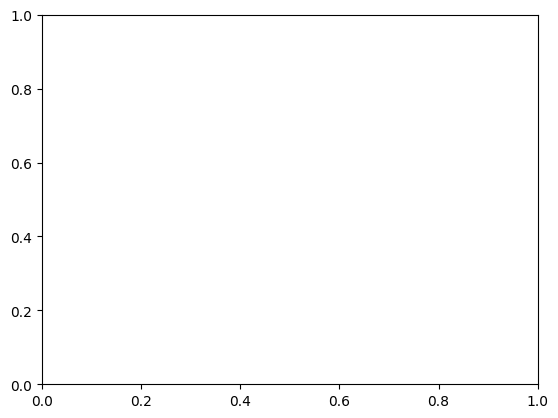

In [178]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
kmf = KaplanMeierFitter()
kmf.fit(durations=df['Duration'], event_observed=df['Default'])

# Get the survival function values at each unique time point
survival_function = kmf.survival_function_

kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()